In [1]:
import torch
import matplotlib as plt
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
from tqdm import tqdm

In [67]:
import os

folder_path = "C:/Users/zacca/Python/DL_Proj_Models/dataset/pathtools_gleason_grading/masks"
files = os.listdir(folder_path)

In [18]:
folder_path = "C:/Users/zacca/Python/DL_Proj_Models/dataset/pathtools_gleason_grading/masks"
files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]

class_1 = []
class_2 = []
class_3 = []
class_4 = []
class_5 = []
class_none = []

for file_name in tqdm(files):
    file_path = os.path.join(folder_path, file_name)
    image = Image.open(file_path)
    image_data = image.getdata()

    if 1 in image_data:
        class_1.append(file_name)

    if 2 in image_data:
        class_2.append(file_name)

    if 3 in image_data:
        class_3.append(file_name)

    if 4 in image_data:
        class_4.append(file_name)

    if 5 in image_data:
        class_5.append(file_name)

    if all(x == 0 for x in image_data):
        class_none.append(file_name)

print(len(class_1))
print(len(class_2))
print(len(class_3))
print(len(class_4))
print(len(class_5))
print(len(class_none))

100%|████████████████████████████████████████████████████████████████████████████| 51468/51468 [09:48<00:00, 87.49it/s]


66
3615
4305
11183
0
33205


In [ ]:
print(len(class_1))
print(len(class_2))
print(len(class_3))
print(len(class_4))
print(len(class_5))
print(len(class_none))

In [97]:
import random

mask_folder_path = "C:/Users/zacca/Python/DL_Proj_Models/dataset/pathtools_gleason_grading/masks"
target_folder_path = "C:/Users/zacca/Python/DL_Proj_Models/dataset/pathtools_gleason_grading/images"

augmented_training_list = class_1 + class_2 + class_3 + random.sample(class_4, 5000) + random.sample(class_none, 5000)
from pathlib import Path
augmented_training_list = set(augmented_training_list)
masks = [str(Path(mask_folder_path) / file) for file in augmented_training_list]  # Combine paths
imgs = [str(Path(target_folder_path) / file) for file in augmented_training_list]  # Combine paths
torch.save((imgs, masks), 'train_data.pth')

In [ ]:
augmented_training_list = class_1 + class_2 + class_3 + random.sample(class_4, 5000) + random.sample(class_none, 5000)
from pathlib import Path

masks = [str(Path(mask_folder_path) / file) for file in augmented_training_list]  # Combine paths
imgs = [str(Path(target_folder_path) / file) for file in augmented_training_list]  # Combine paths
torch.save((imgs, masks), 'val_data.pth')

In [41]:
seeds = [266,
 357,
 802,
 324,
 148,
 86,
 989,
 685,
 410,
 451,
 487,
 11,
 452,
 261,
 578,
 580,
 57,
 609,
 478,
 540,
 349,
 697,
 483,
 177,
 621,
 530,
 835,
 132,
 79,
 477]



# Define the transformation
transform = transforms.Compose([
    transforms.RandomRotation(45),  # Rotate the image by a random angle between -10 and 10 degrees
    transforms.RandomHorizontalFlip(p=0.33),  # Randomly flip the image horizontally with a probability of 0.5
    transforms.RandomVerticalFlip(p=0.33),  # Randomly flip the image vertically with a probability of 0.5
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Randomly change brightness, contrast, saturation, and hue
])

In [42]:
mask_folder_path = "C:/Users/zacca/Python/DL_Proj_Models/dataset/pathtools_gleason_grading/masks"
target_folder_path = "C:/Users/zacca/Python/DL_Proj_Models/dataset/pathtools_gleason_grading/images"

aug_target_folder_path = "C:/Users/zacca/Python/DL_Proj_Models/dataset/pathtools_gleason_grading/images/Augmented"
aug_mask_folder_path = "C:/Users/zacca/Python/DL_Proj_Models/dataset/pathtools_gleason_grading/masks/Augmented"

aug_filename = []
for file_name in class_1:
    mask_file_path = os.path.join(mask_folder_path, file_name)
    target_file_path = os.path.join(target_folder_path, file_name)
    
    mask_image = Image.open(mask_file_path)
    target_image = Image.open(target_file_path)

    for i in range(len(seeds)):
        torch.manual_seed(seeds[i])
        augmented_mask_image = transform(mask_image)
        torch.manual_seed(seeds[i])
        augmented_target_image = transform(target_image)

        aug_filename.append(f"augmented_{file_name[:-4]}_{i}.jpg")

        
        # Save the augmented images
        augmented_mask_file_path = os.path.join(aug_mask_folder_path, f"augmented_{file_name[:-4]}_{i}.jpg")
        augmented_target_file_path = os.path.join(aug_target_folder_path, f"augmented_{file_name[:-4]}_{i}.jpg")
        
        augmented_mask_image.save(augmented_mask_file_path)
        augmented_target_image.save(augmented_target_file_path)

In [98]:
aug_masks = [str(Path(aug_mask_folder_path) / file) for file in aug_filename]  
aug_imgs = [str(Path(aug_target_folder_path) / file) for file in aug_filename]  

aug_masks += masks
aug_imgs += imgs
torch.save((aug_imgs, aug_masks), 'augmented_train_data.pth')

In [46]:
def get_weights(dis):
    total_samples = sum(dis)

    # Calculate inverse class frequencies
    inverse_frequencies = [total_samples / (class_samples * len(dis)) for class_samples in dis]

    # Normalize inverse frequencies to sum up to 1
    class_weights = [freq / sum(inverse_frequencies) for freq in inverse_frequencies]

    return class_weights

In [51]:
aug_dis = [2000, 1063, 4544, 4863, 5000]
dis = [5000, 66, 3615, 4305, 5000]
get_weights(aug_dis)

[0.24196218826831767,
 0.45524400426776607,
 0.106497442019506,
 0.09951149013708314,
 0.09678487530732706]

In [ ]:

folder_path = "C:/Users/zacca/Python/DL_Proj_Models/dataset/pathtools_gleason_grading/masks"
files = os.listdir(folder_path)
uniques = []
for file_name in tqdm(files):
    file_path = os.path.join(folder_path, file_name)
    image = Image.open(file_path)
    image_data = image.getdata()

    unique_numbers = list(set(image_data))
    uniques += [num for num in unique_numbers if num not in uniques]

uniques

In [87]:
answers = {}
avg = []
mask_folder_path = "C:/Users/zacca/Python/DL_Proj_Models/dataset/pathtools_gleason_grading/masks"
for h in tqdm(masks):
    test_image_file_path = os.path.join(mask_folder_path, h)
    test_image = Image.open(test_image_file_path)
    y = np.array(test_image)
   
    
    for j in y:
        for i in j:
            if i in answers:
                answers[i] += 1
            else:
                answers[i] = 1

100%|████████████████████████████████████████████████████████████████████████████| 14208/14208 [05:04<00:00, 46.69it/s]


In [88]:
answers

{3: 105137600, 0: 520223163, 2: 81859073, 4: 223342955, 1: 572697}

In [89]:
total = sum(answers.values())
for i in answers.values():
    print(i/total)

0.11291332073039836
0.5586976006224349
0.08791317059113099
0.23986085578128025
0.0006150522747555295


In [ ]:
[520223163, 572697, 81859073, 105137600, 223342955]

In [90]:
t=[520223163, 572697, 81859073, 105137600, 223342955]
get_weights(t)

[0.0010834159211355083,
 0.9841470399490003,
 0.006885224040317103,
 0.005360765866233133,
 0.002523554223313973]

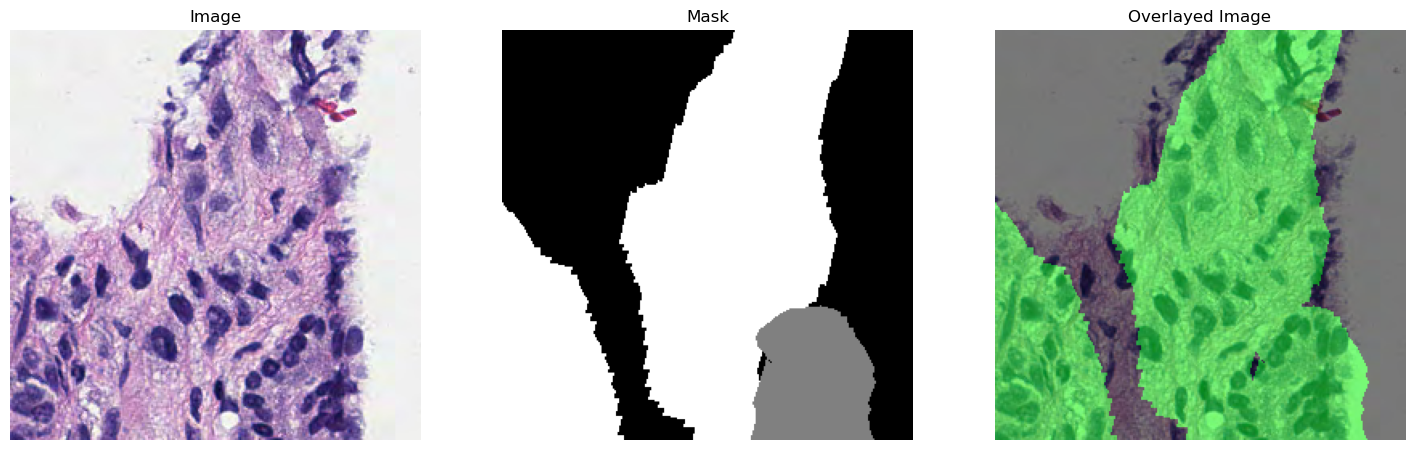

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


mask_folder_path = "C:/Users/zacca/Python/DL_Proj_Models/dataset/pathtools_gleason_grading/masks"
target_folder_path = "C:/Users/zacca/Python/DL_Proj_Models/dataset/pathtools_gleason_grading/images"

# Load the image and mask
image_path = 'path_to_your_image.jpg'
mask_path = 'path_to_your_mask.png'

image = Image.open(os.path.join(target_folder_path, class_4[3730]))
mask = Image.open(os.path.join(mask_folder_path, class_4[3730]))

# Resize the mask to match the dimensions of the image
mask = mask.resize(image.size, Image.NEAREST)

# Convert the mask to a numpy array
mask_array = np.array(mask)

# Create a mask for overlaying (choose a color for the overlay, e.g., green)
overlay_color = [0, 255, 0]  # Green color for overlay
overlay_mask = np.zeros_like(image)
overlay_mask[mask_array != 0] = overlay_color

# Convert the overlay mask back to an image
overlay_image = Image.fromarray(overlay_mask.astype(np.uint8))

# Overlay the mask on the image
overlayed_image = Image.blend(image, overlay_image, alpha=0.5)

# Plot the original image, mask, and overlayed image
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(overlayed_image)
plt.title('Overlayed Image')
plt.axis('off')
plt.savefig('maskoverlay1.png')
plt.show()


In [115]:
 test = torch.load('CNN_results1.pth')

In [116]:
test

{'losses': [0.15367430129300408,
  0.15368054807186127,
  0.15368054807186127,
  0.15368054807186127,
  0.15368054807186127,
  0.15368054807186127,
  0.15368054807186127,
  0.15368054807186127,
  0.15368054807186127,
  0.15368054807186127],
 'accuracies': [36.34132308903405,
  36.40663602436387,
  36.40703982237035,
  36.405825404494024,
  36.406842645787,
  36.407328868401265,
  36.40646711443276,
  36.40622066255555,
  36.40766796642744,
  36.407619690288286],
 'training_times': [186.84069871902466,
  185.0801179409027,
  184.78271532058716,
  184.32958722114563,
  179.10807466506958,
  179.07599544525146,
  179.19310235977173,
  178.9368658065796,
  179.00392723083496,
  179.6881546974182],
 'learning_rates': [0.1,
  0.1,
  0.010000000000000002,
  0.010000000000000002,
  0.0010000000000000002,
  0.0010000000000000002,
  0.00010000000000000003,
  0.00010000000000000003,
  1.0000000000000004e-05,
  1.0000000000000004e-05],
 'val_losses': [0.15368054807186127,
  0.15368054807186127,
  

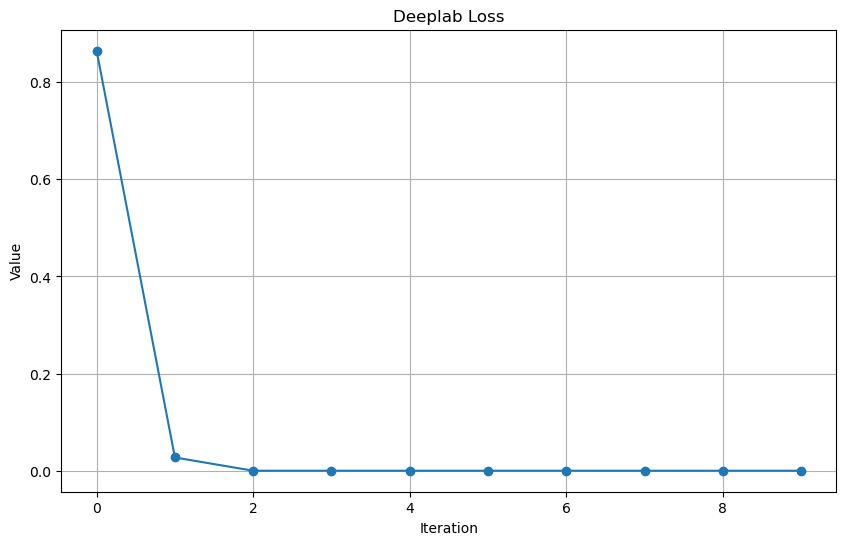

In [125]:
numbers = [0.8646247693538719,
  0.02753645263841761,
  0.00030140899702530474,
  0.0003014189322374162,
  0.0003022749710570821,
  0.0003013888482295617,
  0.00030138587893334694,
  0.0003023142081856343,
  0.0003013843942852396,
  0.0003013835459148925]

indices = list(range(len(numbers)))

# Plot the numbers
plt.figure(figsize=(10, 6))
plt.plot(indices, numbers, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Deeplab Loss')
plt.grid(True)
plt.savefig('Deeplab_Loss.png')  # Save the plot as a PNG file
plt.show()